In [131]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [101]:
df = pd.read_csv('data/taxi_data.csv')
pd.set_option('display.max_colwidth', None)

In [102]:
df.head()

,Reviews,Score,Rider/Driver,Sentiment
0,"Don't bother using this company, they are pathetic. TaxiDrive sent a auto to the wrong address then charged me $5. for not coming out on time. Then TaxiDrive info has been hacked and 5 trips were charged to my Visa card. I notified Visa's fraud department and TaxiDrive. I gave TaxiDrive all the info with the dates, charges and trip code numbers. It's possible to get TaxiDrive on the phone. TaxiDrive keeps asking me via email for the same info I've sent. DON'T USE TaxiDrive.",1.0,R,Negative
1,"I use TaxiDrive service at least 20 times a month, I was charged for an additional stop that I did not take, when I contacted the help website they were less than helpful. I received a response â€œthe driver's additional stop was justifiedâ€, and I in turn was charged the additional amount. So, I asked 3 times for a refund for the money that I added to my account for future trips that I would be taking, and I never received a response. As a matter of fact the Help Desk kept pinging me without a response. This is not the first time that this has happened, but it's the first time that my money was not refunded; it's the same address every time that TaxiDrive adds to my trip.",1.0,R,Negative
2,"TaxiDrive works. I have used it in several places around the world. It is usually cheap, convenient and hassle-free. However, surge pricing can get out of hand. Also, I'm not convinced that they treat their drivers fairly.",4.0,R,Mixed
3,"I was shown a basic fare for the TaxiDrive ride that I booked and the amount is usually same for that route (even with TaxiService). The ride was completed and the basic fare was deducted which was fine. However, later TaxiDrive decided to an additional 5$ on the base fare giving the reason that the route had a flyover where TaxiDrive takes surcharge or toll. I often go by that route but never have I paid any toll or surcharges before. I asked them why wasn't it shown in my base fare or when I booked the ride, they did not have any proper answer. I had attached the response to this complaint. Kindly refer.",1.0,R,Negative
4,My TaxiDrive driver stole my money out of my account. 47 dollars. His name was Michael. License plate **. Be careful he will charge you extra. My ride came up to 7 dollars and they will make up things to take out money out of your account. TaxiDrive is very unprofessional.,1.0,R,Negative


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       2253 non-null   object 
 1   Score         2253 non-null   float64
 2   Rider/Driver  2234 non-null   object 
 3   Sentiment     2232 non-null   object 
dtypes: float64(1), object(3)
memory usage: 98.7+ KB


In [104]:
df[df.isnull().any(axis=1)]

,Reviews,Score,Rider/Driver,Sentiment
90,I drove a cab for over 10 years. I think you're doing the community a great service and understand the payment of what you're doing. People that NEVER drove a cab or service alike don't understand. Those are the people that needs to go back to work doing something else and leave this type of business. They're trying to ruin what decent service we have for the community. Those that want to strike are probably the ones that destroyed the cab business. Keep doing what you're doing. You can't make everybody happy. That's life!!,4.0,NaN,NaN
107,"Rudest, most ignorant and have had 3 or 4 that drive past & LEAVE you stranded particularly IF it IS A RIDE SHARE. THOSE ARE the most economical however some drivers don't want to take them.",1.0,NaN,Negative
108,"TaxiDrive's ratings of its Partners is irrational. 4 out of 5 is 80 percent. The founders probably didn't score 100 percent in college. The overall rating of TaxiDrive is not a 5 star. TaxiDrive platform to send the Partners out without training is expectation is fatal. Why allow the companies ratings to fall immediately with new Partners. The riders are Mal Contemps and not happy with a good, friendly, and safe ride. All new Partners should be required to attend the four hour training. TaxiDrive changed its policy on evaluation mid stream and changed from the 500 ride minimum to a 50 ride minimum.\rOnce a Partner gets de-activated they are treated as if they are a criminal, second class citizen. TaxiDrive does not care about the negative publicity or terminating a Partner.",1.0,NaN,NaN
119,Here are issues not all know the average pay for a driver who drives 600 miles a week is less then you think works out to be $400.00 a week after taxes insurance fuel net is $85.00 a week Break down the price for a trip of 4 miles safe ride fee $1.75 to TaxiDrive provides nothing for the driver trip is $4.00-$1.75-20%= $2.40 to the driver so stop complaining and start hearing. The Driver app does not work for a tech company there not very smart. Learn,4.0,NaN,NaN
191,"If anything goes wrong with the instant payment option, you have to have your bank account linked or you can't get paid. So if you don't have enough a bank account you're screwed and will not be paid. Their support told me this. I'm writing a review and reporting them.",1.0,NaN,NaN
...,...,...,...,...
3148,NaN,NaN,NaN,NaN
3149,NaN,NaN,NaN,NaN
3150,NaN,NaN,NaN,NaN
3151,NaN,NaN,NaN,NaN


In [105]:
df.dropna(inplace=True)

In [106]:
print("Score:", df['Score'].unique())
print("Rider/Driver:", df['Rider/Driver'].unique())
print("Sentiment:", df['Sentiment'].unique())

Score: [1. 4. 2. 5. 3.]
Rider/Driver: ['R' 'D' 'Other' 'Delivery service customer' 'Both R and D' 'other'
 'unclear' 'Unclear' '?' '-' 'Other ' 'R ']
Sentiment: ['Negative' 'Mixed' 'Unclear' 'Positive' 'Unclear ' 'Positive ' 'unclear'
 '?' '-' 'Negative ' 'Unclear, Negative' 'Neagative']


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment'>

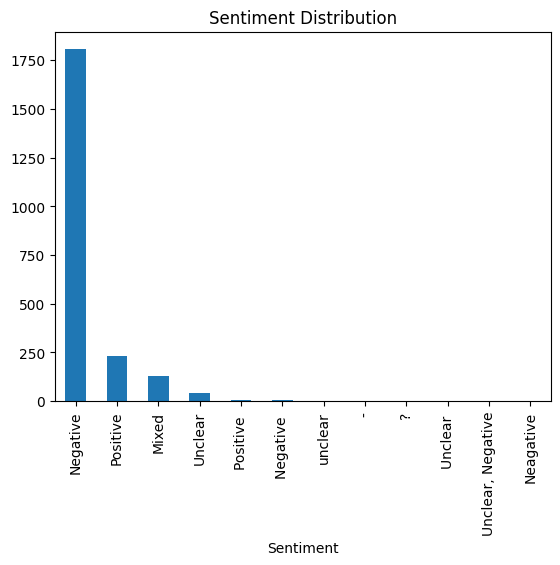

In [107]:
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

In [108]:
sentiment_labels = ['Positive', 'Negative', 'Mixed']
df = df[df['Sentiment'].isin(sentiment_labels)]

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment'>

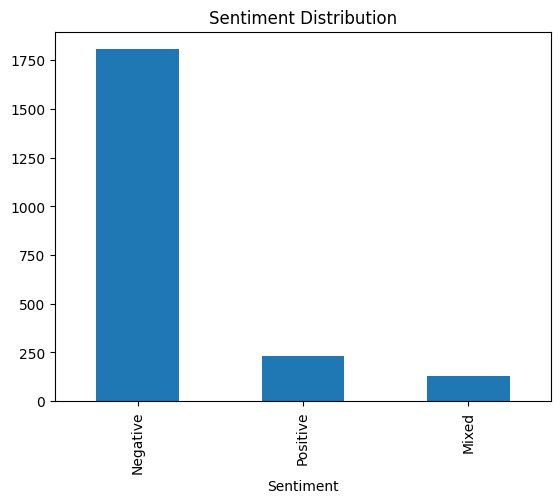

In [109]:
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

<Axes: title={'center': 'Rider/Driver Distribution'}, xlabel='Rider/Driver'>

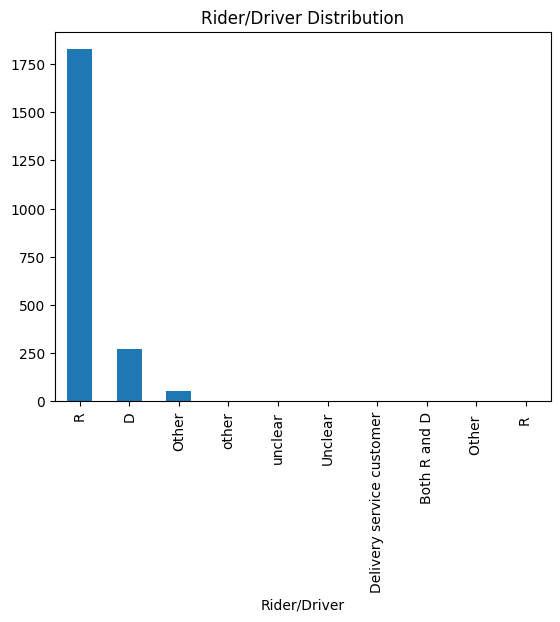

In [110]:
df['Rider/Driver'].value_counts().plot(kind='bar', title='Rider/Driver Distribution')

In [111]:
role_labels = ['R', 'D']
df = df[df['Rider/Driver'].isin(role_labels)]

<Axes: title={'center': 'Rider/Driver Distribution'}, xlabel='Rider/Driver'>

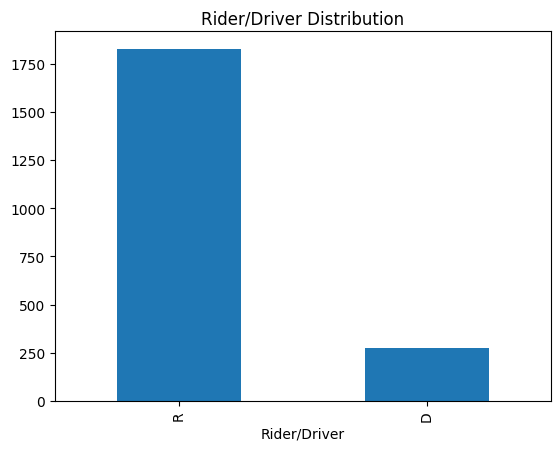

In [112]:
df['Rider/Driver'].value_counts().plot(kind='bar', title='Rider/Driver Distribution')

In [113]:
df['Score'] = df['Score'].astype(int) 

In [114]:
df.head()

,Reviews,Score,Rider/Driver,Sentiment
0,"Don't bother using this company, they are pathetic. TaxiDrive sent a auto to the wrong address then charged me $5. for not coming out on time. Then TaxiDrive info has been hacked and 5 trips were charged to my Visa card. I notified Visa's fraud department and TaxiDrive. I gave TaxiDrive all the info with the dates, charges and trip code numbers. It's possible to get TaxiDrive on the phone. TaxiDrive keeps asking me via email for the same info I've sent. DON'T USE TaxiDrive.",1,R,Negative
1,"I use TaxiDrive service at least 20 times a month, I was charged for an additional stop that I did not take, when I contacted the help website they were less than helpful. I received a response â€œthe driver's additional stop was justifiedâ€, and I in turn was charged the additional amount. So, I asked 3 times for a refund for the money that I added to my account for future trips that I would be taking, and I never received a response. As a matter of fact the Help Desk kept pinging me without a response. This is not the first time that this has happened, but it's the first time that my money was not refunded; it's the same address every time that TaxiDrive adds to my trip.",1,R,Negative
2,"TaxiDrive works. I have used it in several places around the world. It is usually cheap, convenient and hassle-free. However, surge pricing can get out of hand. Also, I'm not convinced that they treat their drivers fairly.",4,R,Mixed
3,"I was shown a basic fare for the TaxiDrive ride that I booked and the amount is usually same for that route (even with TaxiService). The ride was completed and the basic fare was deducted which was fine. However, later TaxiDrive decided to an additional 5$ on the base fare giving the reason that the route had a flyover where TaxiDrive takes surcharge or toll. I often go by that route but never have I paid any toll or surcharges before. I asked them why wasn't it shown in my base fare or when I booked the ride, they did not have any proper answer. I had attached the response to this complaint. Kindly refer.",1,R,Negative
4,My TaxiDrive driver stole my money out of my account. 47 dollars. His name was Michael. License plate **. Be careful he will charge you extra. My ride came up to 7 dollars and they will make up things to take out money out of your account. TaxiDrive is very unprofessional.,1,R,Negative


<Axes: >

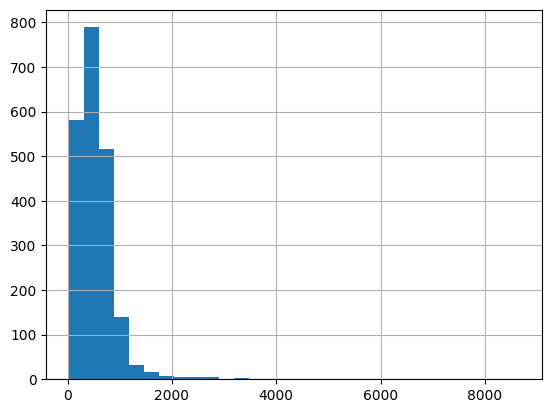

In [115]:
df['Review_Length'] = df['Reviews'].str.len()
df['Review_Length'].hist(bins=30)

In [116]:
df['Review_Length'].describe()

count    2099.000000
mean      536.773225
std       390.539596
min        21.000000
25%       290.000000
50%       481.000000
75%       691.500000
max      8663.000000
Name: Review_Length, dtype: float64

In [117]:
cutoff = df['Review_Length'].quantile(0.99)
before = len(df)
df = df[df['Review_Length'] <= cutoff]
after = len(df)
print(f"Removed {before - after} long reviews.")

Removed 21 long reviews.


In [118]:
df['Review_Length'].describe()

count    2078.000000
mean      513.520693
std       281.645761
min        21.000000
25%       288.000000
50%       477.000000
75%       683.000000
max      1836.000000
Name: Review_Length, dtype: float64

<Axes: >

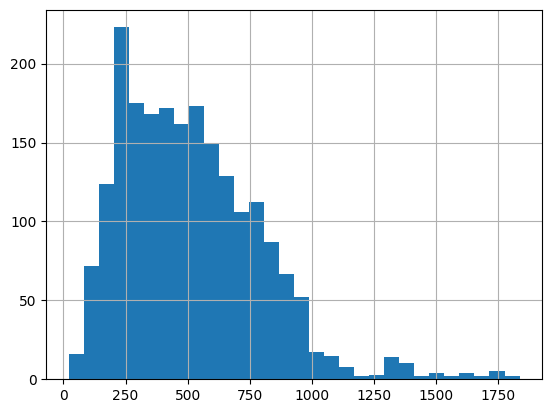

In [119]:
df['Review_Length'] = df['Reviews'].str.len()
df['Review_Length'].hist(bins=30)

<Axes: xlabel='Sentiment', ylabel='Score'>

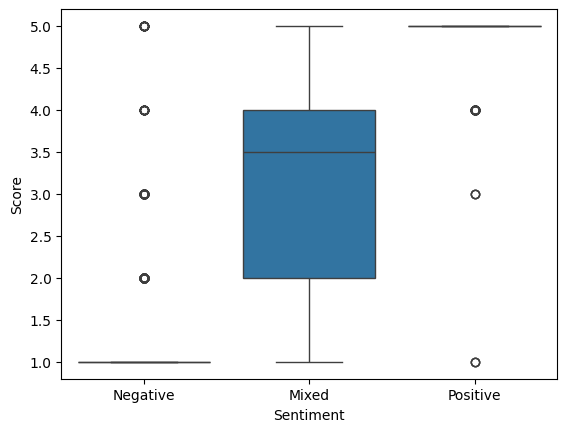

In [120]:
sns.boxplot(data=df, x='Sentiment', y='Score')

In [121]:
# Negative sentiment but high score
negative_positive_score = df[(df['Sentiment'] == 'Negative') & (df['Score'] >= 4)]

# Positive sentiment but low score
positive_negative_score = df[(df['Sentiment'] == 'Positive') & (df['Score'] <= 2)]

In [122]:
negative_positive_score[['Reviews', 'Score', 'Sentiment']].head()

,Reviews,Score,Sentiment
66,I recently had TaxiDrive charge me $190.00 for a trip that should be $16.00. The trip was from Soquel to Santa Cruz. The driver had my fare going from Soquel to S.F . TaxiDrive refuses to make the correct adjustments. Next time I will request Jesse from Capitola .,4,Negative
409,"I have always been skeptical about rideshare services because of the news reports of assaults and robberies. I used this company for the first time earlier this year during a trip for a conference in Las Vegas. My first ride was excellent and was completed without a problem. My second ride was a little scary. I requested a ride but then my phone died. I was with a friend. While I was trying to recharge my phone, my friend came to me to tell me that our ride had arrived As we got in the car, I had an uneasy feeling. I started asking the driver ""who"" he was there to pick up and if he knew where we were going. He never gave me a straight answer and my friend had already told him where we were going.",4,Negative
433,"$#*! TaxiDrive, it's bull $#*!. Who will pay for the more freequent ware and tare. More Oil Changes, more brake changes, more air filters, the injectors will get clogged from all the constent driving. Come On how does this make sence to put over 100,000 mils onto your car, What ever your car was worth before you began TaxiDrive it is not worth $#*! by the end of one year.",5,Negative
496,I live in Clifton nj and needed a car for my wife at 4:30 and it said no cars are available . To take a flight ! So is TaxiDrive 24/7 or not. *****@aol.com I live 14 miles from Manhattan so I thought it would not be a problem.,5,Negative
518,"I took 30 kms trip in Hyderabad, Telangana on 14th Feb 2016. I was charged 19 kms extra. When I asked for fare review they have put surcharge and reduced marginal amount. They are not transparent.",5,Negative


In [123]:
positive_negative_score[['Reviews', 'Score', 'Sentiment']].head()

,Reviews,Score,Sentiment
1185,"Wife and I recently started driving TaxiDrive after our teenager had surgery and we had 5 figures worth of out of pocket expenses. My wife started working with TaxiDrive 3 weeks before me and she referred me. Since then, I get non-stop promotions every single week for the last 3 months. Most recently I started getting ""objectives"" bonuses based on how many customers I take in a week to get an extra bonus.",1,Positive
1244,"We used TaxiDrive for the first time in Panama City Beach last weekend. All three drivers were wonderful. We had a blast. The first driver was so sweet and smart, his daughter called him while we were driving and he would not even talk to her because he was on the job, second guy was sweet and country and professional, third was a female, very sweet and took us right to our motel. We will be using them on our next trip. I don't get the bad reviews but I was in Florida so people may be nicer there. Thank you TaxiDrive.",1,Positive
1769,"March 2019 I took a trip to New York. A coworker suggested I try the TaxiDrive app. Trip one, the pick up at the airport, the driver was sitting in the wrong place and expected me to walk to him at the other end of the terminal. Trip 2 a short ride from my hotel was $20, when a yellow cab for the same trip was $8. The driver again stopped midway down the block and parked in front of another hotel. It took him 25 minutes to find me, when the APP showed his car making circles around the blocks nearby. Trip 3 the driver did not know where to go to find Broadway and Lafayette. TaxiDrive drivers use their personal cars to pick up a few fares. They don't know the normal taxi protocols, and it cost be double or more for each local ride. Yellow Cabs are still a great service, with professionals who may not have fancy black cars, but have expertise in driving.",1,Positive


In [124]:
df = df[~(((df['Sentiment'] == 'Negative') & (df['Score'] >= 4)) |
          ((df['Sentiment'] == 'Positive') & (df['Score'] <= 2)))]

<Axes: xlabel='Sentiment', ylabel='Score'>

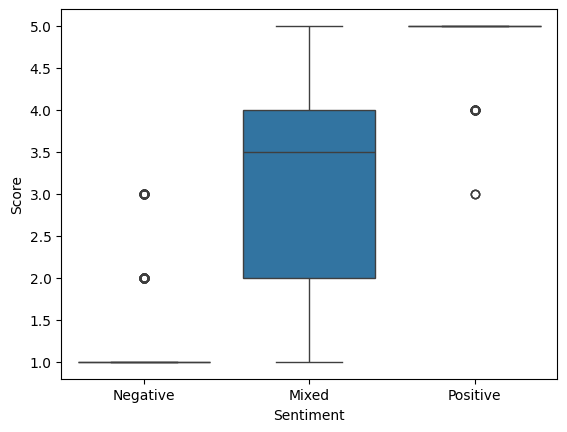

In [125]:
sns.boxplot(data=df, x='Sentiment', y='Score')

In [126]:
df.head()

,Reviews,Score,Rider/Driver,Sentiment,Review_Length
0,"Don't bother using this company, they are pathetic. TaxiDrive sent a auto to the wrong address then charged me $5. for not coming out on time. Then TaxiDrive info has been hacked and 5 trips were charged to my Visa card. I notified Visa's fraud department and TaxiDrive. I gave TaxiDrive all the info with the dates, charges and trip code numbers. It's possible to get TaxiDrive on the phone. TaxiDrive keeps asking me via email for the same info I've sent. DON'T USE TaxiDrive.",1,R,Negative,478
1,"I use TaxiDrive service at least 20 times a month, I was charged for an additional stop that I did not take, when I contacted the help website they were less than helpful. I received a response â€œthe driver's additional stop was justifiedâ€, and I in turn was charged the additional amount. So, I asked 3 times for a refund for the money that I added to my account for future trips that I would be taking, and I never received a response. As a matter of fact the Help Desk kept pinging me without a response. This is not the first time that this has happened, but it's the first time that my money was not refunded; it's the same address every time that TaxiDrive adds to my trip.",1,R,Negative,682
2,"TaxiDrive works. I have used it in several places around the world. It is usually cheap, convenient and hassle-free. However, surge pricing can get out of hand. Also, I'm not convinced that they treat their drivers fairly.",4,R,Mixed,222
3,"I was shown a basic fare for the TaxiDrive ride that I booked and the amount is usually same for that route (even with TaxiService). The ride was completed and the basic fare was deducted which was fine. However, later TaxiDrive decided to an additional 5$ on the base fare giving the reason that the route had a flyover where TaxiDrive takes surcharge or toll. I often go by that route but never have I paid any toll or surcharges before. I asked them why wasn't it shown in my base fare or when I booked the ride, they did not have any proper answer. I had attached the response to this complaint. Kindly refer.",1,R,Negative,613
4,My TaxiDrive driver stole my money out of my account. 47 dollars. His name was Michael. License plate **. Be careful he will charge you extra. My ride came up to 7 dollars and they will make up things to take out money out of your account. TaxiDrive is very unprofessional.,1,R,Negative,273


<Axes: xlabel='Sentiment', ylabel='Review_Length'>

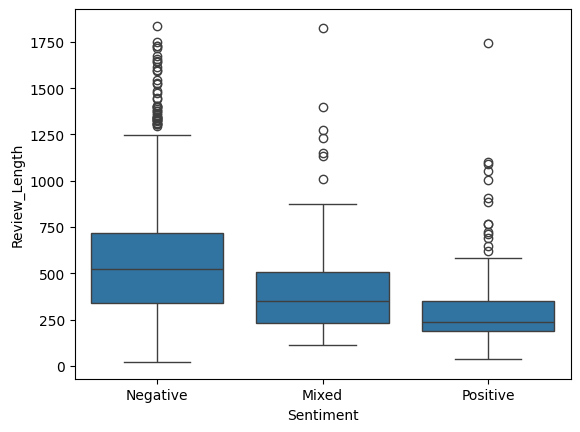

In [127]:
sns.boxplot(data=df, x='Sentiment', y='Review_Length')

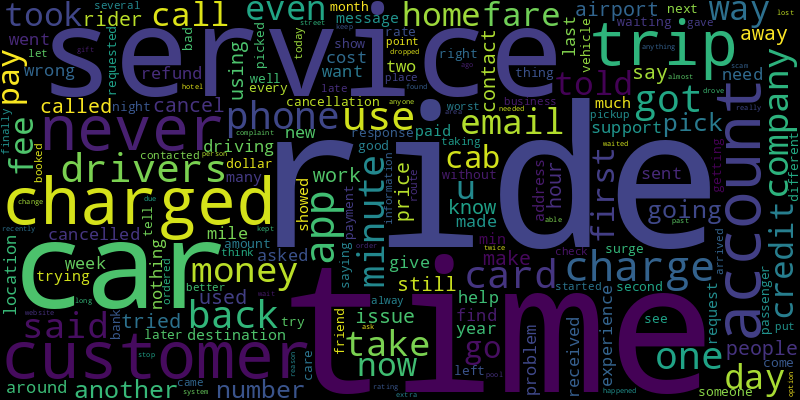

In [128]:
# Start with the default stopwords
custom_stopwords = set(STOPWORDS)

# Add specific words you want to remove
custom_stopwords.update(['taxidrive', 'taxi', 'drive', 'taxiservice', 'will', 'driver'])  # lowercase all

# Create cleaned text
text = ' '.join(df[df['Sentiment'] == 'Negative']['Reviews'].dropna())

# Create the word cloud
WordCloud(
    width=800,
    height=400,
    stopwords=custom_stopwords,
    collocations=False  # avoids joining common word pairs like "Taxi Drive"
).generate(text).to_image()

In [130]:
df.to_csv("data/taxi_data_clean.csv", index=False)